# 변수선택
> Feature Selection

Toyota Corolla 모델의 기능 관련 데이터로 가격 예측하기

In [83]:
import pandas as pd
pd.options.display.float_format = '{:.5f}'.format
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns
sns.color_palette("Set3")
plt.rcParams['figure.figsize'] = [10, 8]
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

<br>
<br>

## 0. 기존 회귀모델 적합

In [3]:
corolla = pd.read_csv("/content/ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [4]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

<br>

### 1-1. 데이터 전처리

In [5]:
Fuel = pd.get_dummies(corolla['Fuel_Type'])

In [6]:
corolla = corolla.drop(["Id", "Model", "Fuel_Type"], axis = 1, inplace = False)
mlr_data = pd.concat((corolla, Fuel),1)
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,CNG,Diesel,Petrol
0,13500,23,10,2002,46986,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,1,0


**상수항 결합**

회귀분석모형 수식을 간단하게 만들기 위해 상수항을 독립변수 데이터에 추가한다.

In [7]:
mlr_data = sm.add_constant(mlr_data, has_constant = "add")
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,CNG,Diesel,Petrol
0,1.0,13500,23,10,2002,46986,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,1,0


설명변수 X와 목표변수 Y를 분류하고 training data와 test data로 나눠준다.

In [8]:
X = mlr_data[mlr_data.columns.difference(["Price"])]
y = mlr_data.Price

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1148, 37) (288, 37) (1148,) (288,)


<br>

### 1-2. 회귀모델 적합

- R-squared:	0.906

In [9]:
full_model = sm.OLS(y_train, X_train)
fitted_full_model = full_model.fit()
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     316.1
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        05:45:10   Log-Likelihood:                -9657.0
No. Observations:                1148   AIC:                         1.938e+04
Df Residuals:                    1114   BIC:                         1.955e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -285.1134    128.420     -2.220      0.027    -537.085     -33.142
Age_08_04         -115.5320      3.957    -29.195      0.000    -123.297    -107.767
Airbag_1           243.7153    256.970      0.948      0.343    -260.484     747.915
Airbag_2           -70.8484    128.717     -0.550      0.582    -323.403     181.706
Airco              196.4510     88.304      2.225      0.026      23.191     369.711
Automatic          422.6387    145.634      2.902      0.004     136.891     708.386
Automatic_airco   2499.3039    187.095     13.358      0.000    2132.205    2866.402
BOVAG_Guarantee    411.3611    127.099      3.237      0.001     161.981     660.742
Backseat_Divider  -220.6297    126.740     -1.741      0.082    -469.306      28.047
Boardcomputer     -186.7714    117.724     -1.587      0.113    -417.756      44.214
CD_Player          287.5007     99.767      2.882      0.004      91.749     483.253
CNG               -838.2547    225.995     -3.709      0.000   -1281.679    -394.830
Central_Lock      -164.7693    145.479     -1.133      0.258    -450.213     120.674
Cylinders           -0.0313      0.002    -14.363      0.000      -0.036      -0.027
Diesel              86.3095    181.164      0.476      0.634    -269.151     441.770
Doors               36.7431     39.822      0.923      0.356     -41.391     114.877
Gears              197.6868    193.493      1.022      0.307    -181.964     577.338
Guarantee_Period    58.1953     13.078      4.450      0.000      32.536      83.855
HP                  21.9656      3.435      6.395      0.000      15.226      28.705
KM                  -0.0165      0.001    -13.197      0.000      -0.019      -0.014
Met_Color           10.7661     75.008      0.144      0.886    -136.407     157.939
Metallic_Rim       206.1162     96.262      2.141      0.032      17.241     394.992
Mfg_Month          -90.7455     10.299     -8.811      0.000    -110.953     -70.538
Mfg_Year             1.4886      0.808      1.843      0.066      -0.096       3.073
Mfr_Guarantee      210.3035     72.415      2.904      0.004      68.218     352.389
Mistlamps          -57.3130    108.737     -0.527      0.598    -270.666     156.040
Petrol             751.9373    187.779      4.004      0.000     383.496    1120.378
Power_Steering    -201.4816    280.591     -0.718      0.473    -752.028     349.065
Powered_Windows    466.2212    146.470      3.183      0.001     178.834     753.608
Quarterly_Tax       12.4157      1.832      6.776      0.000       8.821      16.011
Radio              789.0483    803.008      0.983      0.326    -786.531    2364.628
Radio_cassette    -809.5629    804.050     -1.007      0.314   -2387.186     768.060
Sport_Model        280.3187     88.201      3.178      0.002     107.261     453.377
Tow_Bar           -201.

<br>

### 1-3. 회귀모형 진단

**VIF를 통한 다중공선성 확인**

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


**잔차 확인**

q-q plot을 통한 잔차의 정규분포 확인: 양 끝을 제외하면 정규성을 어느 정도 보이고 있다고 판단할 수 있다.

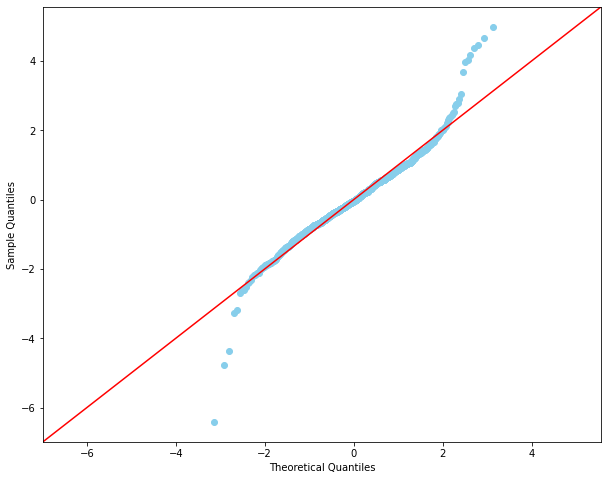

In [11]:
residuals = fitted_full_model.resid
fig = sm.qqplot(residuals, fit = True, line = '45', color="skyblue")

예측값과 잔차 간의 산점도 확인을 통한 잔차패턴 확인: 잔차가 균등하게 분포되어 있으므로 예측값과 잔차 간의 상관관계는 없다고 판단 할 수 있다.

Text(0, 0.5, 'Residual')

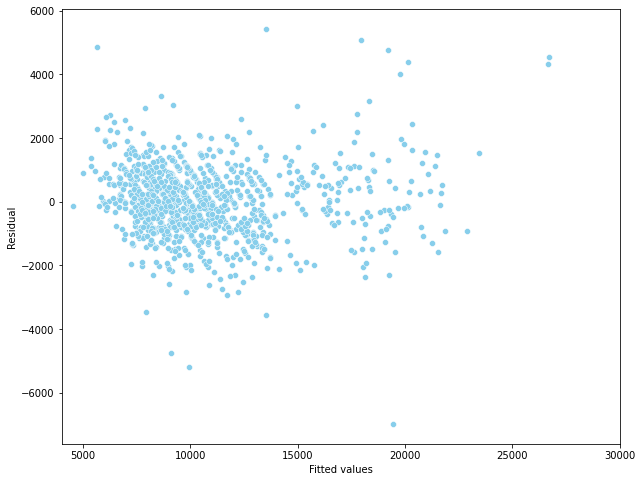

In [12]:
y_train_pred = fitted_full_model.predict(X_train)
sns.scatterplot(y_train_pred, residuals, color='skyblue')
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

<br>

### 1-4. 예측

In [13]:
y_test_pred = fitted_full_model.predict(X_test)
y_test_pred.head()

386     10349.733073
780      8585.925665
694      8000.752648
310     13510.006779
1243     8063.218134
dtype: float64

<br>

### 1-5. 모델 성능 평가

예측 오차

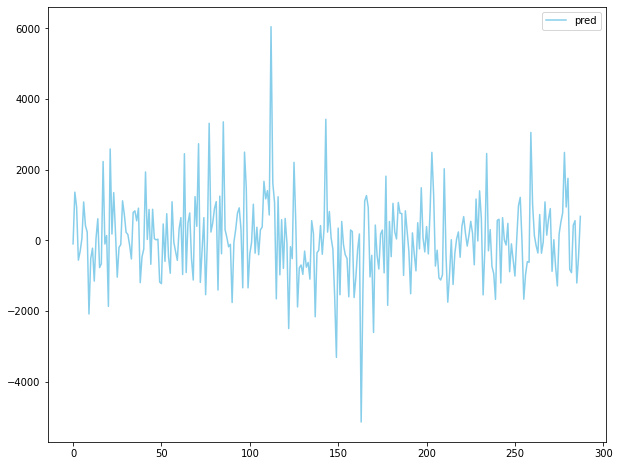

In [14]:
plt.plot(np.array(y_test - y_test_pred), label = "pred", color='skyblue')
plt.legend()
plt.show()

In [15]:
MSE = mean_squared_error(y_test, y_test_pred)
R2 = r2_score(y_test, y_test_pred)

print('MSE:', round(MSE, 3))
print('R2:', round(R2, 3))

MSE: 1319153.181
R2: 0.92


<br>
<br>

## 1. 변수 선택법

전체 변수의 가능한 모든 경우의 수를 찾고 가장 성능이 좋은 모델을 찾는다.

In [16]:
# 변수 선택 함수

def subset_selection(X, y, feature_set):
    model = sm.OLS(y,X[list(feature_set)])
    mlr = model.fit() 
    AIC = mlr.aic 
    return {"model": mlr, "AIC" : AIC}
    
print(subset_selection(X = X_train, y = y_train, feature_set = X_train.columns))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fb14e401a10>, 'AIC': 19382.02618190814}


In [17]:
# 가장 낮은 AIC를 갖는 모델 선택 함수
import time
import itertools 

def get_selected_model(X, y, k):
  tic = time.time()      
  results = []   

   # 변수 조합 경우의 수 
  for combo in itertools.combinations(X.columns.difference(['const']), k) :
    combo = (list(combo)+['const'])
    results.append(subset_selection(X, y, feature_set = combo)) 

  models = pd.DataFrame(results)
  best_model = models.loc[models['AIC'].argmin()]
  toc = time.time()
  print("n : {} \nk : {} \ntime : {} seconds \nAIC: {}\n" .format(models.shape[0], k, round(toc - tic, 4), round(best_model['AIC'], 5)))
  return best_model
    
print(get_selected_model(X_train, y_train, k=2))

n : 630 
k : 2 
time : 0.924 seconds 
AIC: 19964.64305

model    <statsmodels.regression.linear_model.Regressio...
AIC                                                19964.6
Name: 211, dtype: object


In [18]:
models = pd.DataFrame(columns=["AIC", 'model'])
tic = time.time()
for i in range(1, 5):
	models.loc[i] = get_selected_model(X_train, y_train, k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic),"seconds.")

n : 36 
k : 1 
time : 0.0503 seconds 
AIC: 20267.64722

n : 630 
k : 2 
time : 0.8602 seconds 
AIC: 19964.64305

n : 7140 
k : 3 
time : 10.6808 seconds 
AIC: 19825.43497

n : 58905 
k : 4 
time : 91.9579 seconds 
AIC: 19603.37195

Total elapsed time: 106.47723054885864 seconds.


In [19]:
# 가장 AIC가 낮은 모델의 OLS결과를 출력
subset_model = models.loc[models['AIC'].argmin(), "model"]
subset_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     2168.
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        05:47:01   Log-Likelihood:                -9908.7
No. Observations:                1148   AIC:                         1.983e+04
Df Residuals:                    1144   BIC:                         1.985e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0227      0.001    -17.713      0.000      -0.025      -0.020
Mfg_Year    1483.5097     35.693     41.563      0.000    1413.479    1553.541
Weight        18.2829      0.931     19.631      0.000      16.456      20.110
const      -2.974e+06   7.09e+04    -41.943      0.000   -3.11e+06   -2.83e+06
==============================================================================
Omnibus:                      194.147   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2387.683
Skew:                          -0.359   Prob(JB):                         0.00
Kurtosis:                      10.029   Cond. No.                     1.38e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br>
<br>

## 2. 전진선택법
> Forawrd Selection

In [37]:
def forward_selection(X, y, predictors):
	
    # predictors: 현재 선택된 변수
    # predictors에 있는지 없는지 확인한 후 진행    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors :
      results.append(subset_selection(X, y, feature_set=predictors+[p]+['const']))
    
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("n : {} \nk : {} \ntime : {} seconds \nAIC: {}" .format(models.shape[0], len(predictors)+1, round(toc - tic, 4), round(best_model['AIC'], 5)))
    print("Selected predictors : {}\n".format(best_model["model"].model.exog_names))
    return best_model

In [38]:
def get_forward_model(X, y):

    forward_models = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
      forward_result = forward_selection(X, y, predictors)
      if i > 1 :
        if forward_result["AIC"] > forward_model_before:
          break
      forward_models.loc[i] = forward_result
      predictors = forward_models.loc[i]["model"].model.exog_names
      forward_model_before = forward_models.loc[i]["AIC"]
      predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("time : {} seconds" .format(round(toc-tic, 4)))
  
    return (forward_models['model'][len(forward_models['model'])])

In [39]:
forward_best_model = get_forward_model(X_train, y_train)

n : 36 
k : 1 
time : 0.0552 seconds 
AIC: 20267.64722
Selected predictors : ['Mfg_Year', 'const']

n : 35 
k : 2 
time : 0.0485 seconds 
AIC: 19964.64305
Selected predictors : ['Mfg_Year', 'Automatic_airco', 'const']

n : 34 
k : 3 
time : 0.0495 seconds 
AIC: 19831.40333
Selected predictors : ['Mfg_Year', 'Automatic_airco', 'HP', 'const']

n : 33 
k : 4 
time : 0.0507 seconds 
AIC: 19713.93341
Selected predictors : ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'const']

n : 32 
k : 5 
time : 0.0622 seconds 
AIC: 19524.41492
Selected predictors : ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'const']

n : 31 
k : 6 
time : 0.0529 seconds 
AIC: 19492.51067
Selected predictors : ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'const']

n : 30 
k : 7 
time : 0.051 seconds 
AIC: 19467.38728
Selected predictors : ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'const']

n : 29 
k : 8 
time : 0.0783 seconds 
AIC: 1

In [31]:
forward_best_model.aic

19366.980818663385

In [41]:
forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     475.7
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        05:55:01   Log-Likelihood:                -9660.5
No. Observations:                1148   AIC:                         1.937e+04
Df Residuals:                    1125   BIC:                         1.948e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1389.9974     46.009     30.211      0.000    1299.724    1480.271
Automatic_airco   2443.4481    173.027     14.122      0.000    2103.957    2782.939
HP                  21.3829      3.271      6.538      0.000      14.966      27.800
Weight               9.7077      1.132      8.576      0.000       7.487      11.929
KM                  -0.0165      0.001    -13.337      0.000      -0.019      -0.014
Powered_Windows    323.4218     82.807      3.906      0.000     160.948     485.895
Quarterly_Tax       12.5202      1.761      7.111      0.000       9.066      15.975
Guarantee_Period    59.4326     12.872      4.617      0.000      34.177      84.688
Petrol           -6.949e+05   2.29e+04    -30.310      0.000    -7.4e+05    -6.5e+05
BOVAG_Guarantee    433.2046    125.000      3.466      0.001     187.945     678.464
Tow_Bar           -189.6819     76.154     -2.491      0.013    -339.101     -40.263
CD_Player          283.5996     95.697      2.964      0.003      95.834     471.365
Sport_Model        290.4807     82.664      3.514      0.000     128.288     452.674
Mfr_Guarantee      210.4917     71.283      2.953      0.003      70.629     350.354
Backseat_Divider  -254.2855    115.161     -2.208      0.027    -480.241     -28.330
Metallic_Rim       202.0500     88.559      2.282      0.023      28.291     375.809
ABS               -315.6618     98.580     -3.202      0.001    -509.083    -122.240
Mfg_Month           25.1820     10.179      2.474      0.014       5.210      45.154
Automatic          379.8205    143.297      2.651      0.008      98.662     660.979
CNG              -6.966e+05   2.29e+04    -30.372      0.000   -7.42e+05   -6.52e+05
Airco              183.7799     84.928      2.164      0.031      17.146     350.414
Boardcomputer     -193.5814    115.365     -1.678      0.094    -419.937      32.774
Diesel           -6.957e+05   2.29e+04    -30.338      0.000   -7.41e+05   -6.51e+05
const            -2.087e+06   6.88e+04    -30.341      0.000   -2.22e+06   -1.95e+06
==============================================================================
Omnibus:                      113.437   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              747.145
Skew:                           0.130   Prob(JB):                    5.75e-163
Kurtosis:                       6.944   Cond. No.                     5.66e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.17e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<br>
<br>

## 3. 후진소거법

In [53]:
def backward_selection(X, y, predictors):
    tic = time.time()
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors) - 1):
      results.append(subset_selection(X, y, feature_set=list(combo)+['const']))

    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()

    print("n : {} \nk : {} \ntime : {} seconds \nAIC: {}" .format(models.shape[0], len(predictors) - 1, round(toc - tic, 4), round(best_model['AIC'], 5)))
    print("Selected predictors : {}\n".format(best_model["model"].model.exog_names))
    return best_model

In [54]:
def get_backward_model(X, y) :

    backward_models = pd.DataFrame(columns=["AIC","model"], index = range(1,len(X.columns)))
    tic = time.time()

    predictors = X.columns.difference(['const'])

    backward_model_before = subset_selection(X, y, predictors)['AIC']

    while (len(predictors) > 1):
      backward_result = backward_selection(X_train, y_train, predictors)
      if backward_result['AIC'] > backward_model_before :
        break
      backward_models.loc[len(predictors) -1] = backward_result
      predictors = backward_models.loc[len(predictors) - 1]['model'].model.exog_names
      backward_model_before = backward_result["AIC"]
      predictors = [k for k in predictors if k != 'const']
    
    toc = time.time()
    print("time : {} seconds" .format(round(toc-tic, 4)))
    return (backward_models["model"].dropna().iloc[0])

In [55]:
backward_best_model = get_backward_model(X_train, y_train)

n : 36 
k : 35 
time : 0.248 seconds 
AIC: 19380.04741
Selected predictors : ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']

n : 35 
k : 34 
time : 0.1777 seconds 
AIC: 19378.34134
Selected predictors : ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio'

In [56]:
backward_best_model.aic

19366.98081866342

In [57]:
backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     475.7
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        06:04:07   Log-Likelihood:                -9660.5
No. Observations:                1148   AIC:                         1.937e+04
Df Residuals:                    1125   BIC:                         1.948e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -315.6618     98.580     -3.202      0.001    -509.083    -122.240
Airco              183.7799     84.928      2.164      0.031      17.146     350.414
Automatic          379.8205    143.297      2.651      0.008      98.662     660.979
Automatic_airco   2443.4481    173.027     14.122      0.000    2103.957    2782.939
BOVAG_Guarantee    433.2046    125.000      3.466      0.001     187.945     678.464
Backseat_Divider  -254.2855    115.161     -2.208      0.027    -480.241     -28.330
Boardcomputer     -193.5814    115.365     -1.678      0.094    -419.937      32.774
CD_Player          283.5996     95.697      2.964      0.003      95.834     471.365
CNG              -1673.0043    365.120     -4.582      0.000   -2389.397    -956.612
Cylinders        -6.546e+05   2.16e+04    -30.333      0.000   -6.97e+05   -6.12e+05
Diesel            -769.9788    275.277     -2.797      0.005   -1310.093    -229.864
Guarantee_Period    59.4326     12.872      4.617      0.000      34.177      84.688
HP                  21.3829      3.271      6.538      0.000      14.966      27.800
KM                  -0.0165      0.001    -13.337      0.000      -0.019      -0.014
Metallic_Rim       202.0500     88.559      2.282      0.023      28.291     375.809
Mfg_Month           25.1820     10.179      2.474      0.014       5.210      45.154
Mfg_Year          1389.9974     46.009     30.211      0.000    1299.724    1480.271
Mfr_Guarantee      210.4917     71.283      2.953      0.003      70.629     350.354
Powered_Windows    323.4218     82.807      3.906      0.000     160.948     485.895
Quarterly_Tax       12.5202      1.761      7.111      0.000       9.066      15.975
Sport_Model        290.4807     82.664      3.514      0.000     128.288     452.674
Tow_Bar           -189.6819     76.154     -2.491      0.013    -339.101     -40.263
Weight               9.7077      1.132      8.576      0.000       7.487      11.929
const            -1.637e+05   5395.118    -30.333      0.000   -1.74e+05   -1.53e+05
==============================================================================
Omnibus:                      113.437   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              747.145
Skew:                           0.130   Prob(JB):                    5.75e-163
Kurtosis:                       6.944   Cond. No.                     6.01e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.93e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<br>
<br>

## 4. 단계적 선택법

In [74]:
def get_stepwise_model(X, y):

    stepwise_models = pd.DataFrame(columns = ["AIC", "model"])
    tic = time.time()

    predictors = []
    stepwise_model_before = subset_selection(X, y, predictors + ['const'])['AIC']
    
    for i in range(1, len(X.columns.difference(['const'])) + 1) :
        forward_result = forward_selection(X, y, predictors)
        stepwise_models.loc[i] = forward_result
        print('forward')
        predictors = stepwise_models.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'const']

        backward_result = backward_selection(X, y, predictors)

        if backward_result["AIC"] < forward_result["AIC"]:
            stepwise_models.loc[i] = backward_result
            predictors = stepwise_models.loc[i]["model"].model.exog_names
            stepwise_model_before = stepwise_models.loc[i]["AIC"]
            predictors = [k for k in predictors if k != "const"]
            print('backward')

        if stepwise_models.loc[i]["AIC"] > stepwise_model_before:
            break

        else :
            stepwise_model_before = stepwise_models.loc[i]["AIC"]

    toc = time.time()

    print("time : {} seconds" .format(round(toc-tic, 4)))
    return (stepwise_models["model"][len(stepwise_models["model"])])

In [75]:
stepwise_best_model = get_stepwise_model(X_train, y_train)

n : 36 
k : 1 
time : 0.0469 seconds 
AIC: 20267.64722
Selected predictors : ['Mfg_Year', 'const']

forward
n : 1 
k : 0 
time : 0.002 seconds 
AIC: 22000.46442
Selected predictors : ['const']

n : 35 
k : 2 
time : 0.0456 seconds 
AIC: 19964.64305
Selected predictors : ['Mfg_Year', 'Automatic_airco', 'const']

forward
n : 2 
k : 1 
time : 0.0033 seconds 
AIC: 20267.64722
Selected predictors : ['Mfg_Year', 'const']

n : 34 
k : 3 
time : 0.0467 seconds 
AIC: 19831.40333
Selected predictors : ['Mfg_Year', 'Automatic_airco', 'HP', 'const']

forward
n : 3 
k : 2 
time : 0.0053 seconds 
AIC: 19964.64305
Selected predictors : ['Mfg_Year', 'Automatic_airco', 'const']

n : 33 
k : 4 
time : 0.0476 seconds 
AIC: 19713.93341
Selected predictors : ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'const']

forward
n : 4 
k : 3 
time : 0.007 seconds 
AIC: 19831.40333
Selected predictors : ['Mfg_Year', 'Automatic_airco', 'HP', 'const']

n : 32 
k : 5 
time : 0.0526 seconds 
AIC: 19524.41492
Selected

In [76]:
stepwise_best_model.aic

19366.980818663385

<br>
<br>

## 5. 성능 평가

In [87]:
# 모델에 의해 예측된/추정된 값 = test_y
y_pred_full = fitted_full_model.predict(X_test)
y_pred_subset = subset_model.predict(X_test[subset_model.model.exog_names])
y_pred_forward = forward_best_model.predict(X_test[forward_best_model.model.exog_names])
y_pred_backward = backward_best_model.predict(X_test[backward_best_model.model.exog_names])
y_pred_stepwise = stepwise_best_model.predict(X_test[stepwise_best_model.model.exog_names])

In [86]:
result_compare = pd.DataFrame(columns=["full model", "subset model", "forward model", "backward model", "stepwise model"], 
                              index=['k', 'Rsquared', 'AIC', 'MSE'])

result_compare['full model'] = [fitted_full_model.params.shape, fitted_full_model.rsquared, fitted_full_model.aic, fitted_full_model.mse_total]
result_compare['subset model'] = [subset_model.params.shape, subset_model.rsquared, subset_model.aic, subset_model.mse_total]
result_compare['forward model'] = [forward_best_model.params.shape, forward_best_model.rsquared, forward_best_model.aic, forward_best_model.mse_total]
result_compare['backward model'] = [backward_best_model.params.shape, backward_best_model.rsquared, backward_best_model.aic, backward_best_model.mse_total]
result_compare['stepwise model'] = [stepwise_best_model.params.shape, stepwise_best_model.rsquared, stepwise_best_model.aic, stepwise_best_model.mse_total]

result_compare

,full model,subset model,forward model,backward model,stepwise model
k,"(37,)","(4,)","(24,)","(24,)","(24,)"
Rsquared,0.90351,0.85041,0.90293,0.90293,0.90293
AIC,19382.02618,19825.43497,19366.98082,19366.98082,19366.98082
MSE,12303813.86669,12303813.86669,12303813.86669,12303813.86669,12303813.86669


<br>
<br>

---

[참고 자료](https://todayisbetterthanyesterday.tistory.com/10)